In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
!!! This code is for transforming raw data from Kaggle into clean and required data.

If you want to run it, please download the raw data (more than 100 M) from 

https://www.kaggle.com/datasets/azraimohamad/news-article-weekly-updated?select=news_v1.csv

and rename it as news_raw.csv

'''

df = pd.read_csv('../data/news_raw.csv', encoding='utf-8')
df.head()

df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df_filtered = df[df['content_length'] == 'Short']

# keep columns
columns_to_keep = [
    "content_id", "title", "text", "section", "published_date", "word_count"
]
df_filtered = df_filtered[columns_to_keep]
df_filtered['published_date'] = pd.to_datetime(df_filtered['published_date'], errors='coerce')
df_filtered.rename(columns={"section": "category"}, inplace=True)
df_filtered['category'] = df_filtered['category'].replace({
    'News': 'Others',
    'AseanPlus': 'Politics'
})

df_sorted = df_filtered.sort_values(by='published_date', ascending=False).head(1000)
df_sorted.to_csv('../data/1K_news.csv', index=False, encoding='utf-8')

In [5]:
df = pd.read_csv('../data/1K_news.csv', encoding='utf-8')
df.head()

,content_id,title,text,category,published_date,word_count
0,1567967,Civil servants can opt for flexible working ho...,PUTRAJAYA: Civil servants will have the option...,Others,2025-02-28,267
1,1567539,Cambodia launches project to improve disposal ...,PHNOM PENH: Cambodia on Thursday (Feb 27) laun...,Politics,2025-02-28,231
2,1567650,One crew member injured after ‘unauthorised bo...,SINGAPORE: One crew member of a Singapore-regi...,Politics,2025-02-28,188
3,1567647,"MMEA stops boat off Semporna, seizes illegally...",KOTA KINABALU: Marine officials recently seize...,Others,2025-02-28,219
4,1567641,Air quality worsens in all of Bangkok,BANGKOK: The air quality in all 50 districts o...,Politics,2025-02-28,251


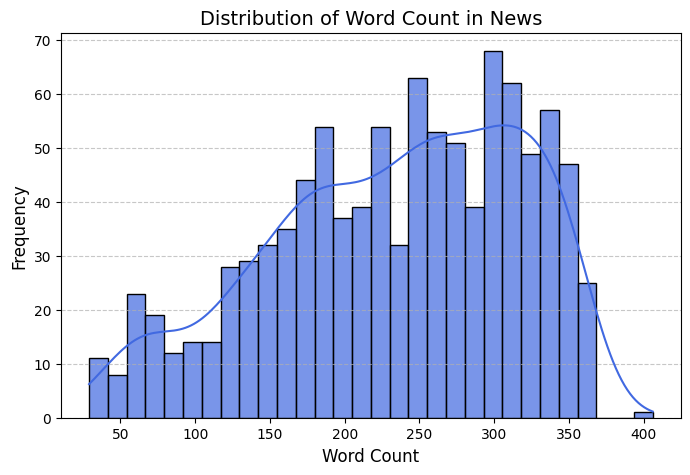

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=30, kde=True, color="royalblue", edgecolor='black', alpha=0.7)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Word Count in News', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


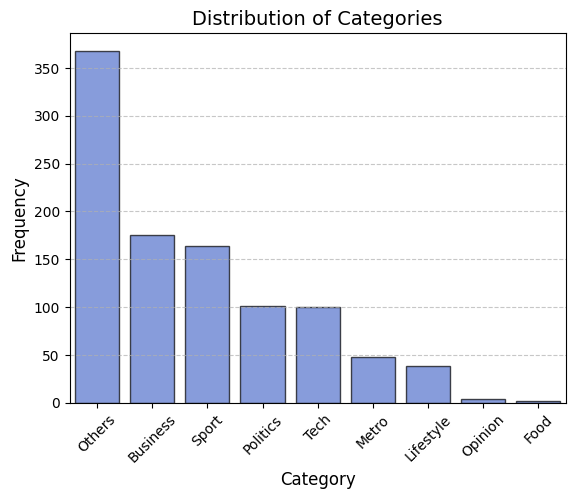

In [7]:
category_counts = df['category'].value_counts().sort_values(ascending=False)
sns.barplot(x=category_counts.index, y=category_counts.values, color="royalblue", edgecolor='black', alpha=0.7)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Categories', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()